In [1]:
import pandas as pd
import numpy as np

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/combined_tmdb_data.csv.gz',lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.112,2245.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.800,50.0,R


In [3]:
# Duplicate values
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### Removing unnecessary columns

In [4]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,2000-11-15,0.0,100.0,For the Cause,5.100,8.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",24.758,2000-09-29,14204632.0,99.0,In the Mood for Love,8.112,2245.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",4.001,2000-09-02,0.0,99.0,Chinese Coffee,6.800,50.0,R


### Cleaning 'belongs_to_collection' column 
- Changing the column to a boolean value to address the NaN values.

In [5]:
df['belongs_to_collection'].value_counts()

{'id': 148065, 'name': 'Doraemon Collection', 'poster_path': '/4TLSP1KD1uAlp2q1rTrc6SFlktX.jpg', 'backdrop_path': '/rc6OFcSasL5YxBRPUQVwxmVF6h5.jpg'}             16
{'id': 39199, 'name': 'Detective Conan Collection', 'poster_path': '/1wBfr532NOQK68wlo5ApjCmiQIB.jpg', 'backdrop_path': '/9bogrpii4e61SR6a9qLHow7I46U.jpg'}       16
{'id': 403643, 'name': 'Troublesome Night Collection', 'poster_path': '/bPTx3TP4UJTHQfcLx4qIub9LXmi.jpg', 'backdrop_path': '/n3a7zF5GuxM2X8oPF6pKXqYS6ER.jpg'}    15
{'id': 534673, 'name': 'Madea - Collection', 'poster_path': '/bO9NvwpSElW8lp33fGyy8VaS5s9.jpg', 'backdrop_path': '/qxLbjNPrMKTgYrMhIIDzj4zgYjf.jpg'}              11
{'id': 23616, 'name': 'Naruto Collection', 'poster_path': '/q9rrfRgPUFkFqDF74jlvNYp3RpN.jpg', 'backdrop_path': '/prLI2SNNkd9wcQkFh9iWXzQtR5D.jpg'}                11
                                                                                                                                                                  ..
{'id': 946

In [6]:
# Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    56488
True      3756
Name: belongs_to_collection, dtype: int64

### Cleaning 'genres' column 
- taking out of list
- exploding to separate column
- OHE each genre into a separate column

In [7]:
# View a test case for genres
df['genres'][0]

"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}]"

In [8]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [9]:
## Use our function on our test case
get_genre_name(df.loc[0,'genres'])

['Comedy', 'Music', 'Romance']

In [10]:
## Use our function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Comedy
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Music
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Romance
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,2000-11-15,0.0,100.0,For the Cause,5.1,8.0,NaN,Science Fiction
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,2000-04-14,0.0,152.0,Gang,4.0,1.0,NaN,Drama


In [11]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [12]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,...,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,2000-11-15,0.0,100.0,For the Cause,...,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,2000-04-14,0.0,152.0,Gang,...,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,True,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",24.758,2000-09-29,14204632.0,99.0,In the Mood for Love,...,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",4.001,2000-09-02,0.0,99.0,Chinese Coffee,...,False,False,False,False,False,False,False,False,False,False


In [13]:
## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,3.004,2000-09-22,0.0,86.0,The Fantasticks,5.500,...,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,1.678,2000-11-15,0.0,100.0,For the Cause,5.100,...,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,0.930,2000-04-14,0.0,152.0,Gang,4.000,...,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,True,150000.0,24.758,2000-09-29,14204632.0,99.0,In the Mood for Love,8.112,...,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,4.001,2000-09-02,0.0,99.0,Chinese Coffee,6.800,...,False,False,False,False,False,False,False,False,False,False


### Correcting 'certification' values.

In [14]:
## Checking Certification values counts
df['certification'].value_counts(dropna=False)

NaN                                45593
R                                   6114
NR                                  3269
PG-13                               3226
PG                                  1432
G                                    443
NC-17                                156
Unrated                                5
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
R                                      1
PG-13                                  1
10                                     1
Name: certification, dtype: int64

In [15]:
# fix extra space in PG-13
df['certification'] = df['certification'].str.strip()

In [16]:
## Clean certification column values
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      45594
R         6115
NR        3277
PG-13     3227
PG        1432
G          443
NC-17      156
Name: certification, dtype: int64

### Converting 'release_date' to separate columns for Y/M/D.

In [17]:
## view value_counts()
df['release_date'].value_counts()

2009-01-01    265
2010-01-01    244
2008-01-01    232
2011-01-01    209
2012-01-01    187
             ... 
2006-01-15      1
2004-07-12      1
2011-05-28      1
2011-03-07      1
2022-08-31      1
Name: release_date, Length: 7644, dtype: int64

In [18]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,3.004,2000-09-22,0.0,86.0,The Fantasticks,5.500,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.678,2000-11-15,0.0,100.0,For the Cause,5.100,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.930,2000-04-14,0.0,152.0,Gang,4.000,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,True,150000.0,24.758,2000-09-29,14204632.0,99.0,In the Mood for Love,8.112,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,4.001,2000-09-02,0.0,99.0,Chinese Coffee,6.800,...,False,False,False,False,False,False,False,2000.0,9.0,2.0


In [19]:
## drop original feature
df = df.drop(columns=['release_date'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,3.004,0.0,86.0,The Fantasticks,5.500,22.0,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.678,0.0,100.0,For the Cause,5.100,8.0,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.930,0.0,152.0,Gang,4.000,1.0,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,True,150000.0,24.758,14204632.0,99.0,In the Mood for Love,8.112,2245.0,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,4.001,0.0,99.0,Chinese Coffee,6.800,50.0,...,False,False,False,False,False,False,False,2000.0,9.0,2.0


In [20]:
# Save cleaned df as CSV
df.to_csv('Data/clean_combined_tmdb_data.csv.gz',compression='gzip',index=False)

In [21]:
# View info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60244 entries, 0 to 60243
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60244 non-null  object 
 1   adult                  60244 non-null  float64
 2   belongs_to_collection  60244 non-null  bool   
 3   budget                 60244 non-null  float64
 4   popularity             60244 non-null  float64
 5   revenue                60244 non-null  float64
 6   runtime                59457 non-null  float64
 7   title                  60244 non-null  object 
 8   vote_average           60244 non-null  float64
 9   vote_count             60244 non-null  float64
 10  certification          14650 non-null  object 
 11  Genre_Comedy           60244 non-null  bool   
 12  Genre_Music            60244 non-null  bool   
 13  Genre_Romance          60244 non-null  bool   
 14  Genre_Science Fiction  60244 non-null  bool   
 15  Ge

In [22]:
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,3.004,0.0,86.0,The Fantasticks,5.500,22.0,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.678,0.0,100.0,For the Cause,5.100,8.0,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.930,0.0,152.0,Gang,4.000,1.0,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,True,150000.0,24.758,14204632.0,99.0,In the Mood for Love,8.112,2245.0,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,4.001,0.0,99.0,Chinese Coffee,6.800,50.0,...,False,False,False,False,False,False,False,2000.0,9.0,2.0


In [23]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

# Train Test Split

In [31]:
# Make x and y variables
y = df['revenue']
X = df.drop(columns=['revenue','title','imdb_id'])

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
51618,0.0,False,0.0,2.774,60.0,6.2,42.0,NaN,True,False,...,False,False,False,False,False,False,False,2019.0,10.0,18.0
55948,0.0,False,0.0,3.273,100.0,4.0,3.0,NaN,False,False,...,False,False,False,False,False,False,False,2020.0,2.0,12.0
7561,0.0,False,0.0,0.945,106.0,2.7,3.0,NaN,False,False,...,False,False,False,False,False,False,False,2005.0,10.0,21.0
13644,0.0,False,0.0,0.600,82.0,0.0,0.0,NaN,False,False,...,False,False,False,False,False,False,False,2008.0,9.0,20.0
10896,0.0,False,0.0,3.308,112.0,6.1,6.0,NaN,True,False,...,False,False,False,False,False,False,False,2007.0,2.0,14.0


In [32]:
# Sum up NAs
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                    602
vote_average                 0
vote_count                   0
certification            34223
Genre_Comedy                 0
Genre_Music                  0
Genre_Romance                0
Genre_Science Fiction        0
Genre_Drama                  0
Genre_Action                 0
Genre_Crime                  0
Genre_Adventure              0
Genre_Animation              0
Genre_Fantasy                0
Genre_Horror                 0
Genre_Thriller               0
Genre_History                0
Genre_Family                 0
Genre_Mystery                0
Genre_Western                0
Genre_War                    0
Genre_TV Movie               0
Genre_Documentary            0
year                       794
month                      794
day                        794
dtype: int64

### Preprocessing Categorical Columns

In [33]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

### Preprocessing Numerical Columns


In [34]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

### Collecting manual boolean OHE columns for pipeline

In [35]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [36]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

### Pipelines for Column Transformer(& Preprocessor)

In [37]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols),
                                       ('passthrough',already_ohe_cols))# remainder='passthrough')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', '...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [38]:
## fit the col transformer to Train 
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### Getting Feature Names Out

In [39]:
##Using list-slicing to find the encoder 
                                                        # '-1' is for the ohe section of the pipeline
cat_features = preprocessor.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_cols)

## Create the empty list
final_features = [*cat_features,*num_cols,*already_ohe_cols]
len(final_features)

36

In [40]:
## checking shape matches len final features
preprocessor.transform(X_train).shape

(45183, 36)

## Create data frame for transformed TTS

In [41]:
## make X_train_tf 
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()


,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
51618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.273,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7561,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13644,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10896,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.308,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
## make X_test_tf 
X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
44075,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.614,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
54741,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5000.0,0.600,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14256,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.245,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46230,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.412,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Adding a Constant for Statsmodels

- Tip: make sure that add_constant actually added a new column! You may need to change the parameter has_constant to "add"

In [43]:
#import statsmodels correctly
import statsmodels.api as sm

In [1]:
## Make final X_train_df and X_test_df with constants added
# prepend = True is to add the column to the front of the Dataframe
X_train_df = sm.add_constant(X_train_tf, prepend=True)
X_test_df = sm.add_constant(X_test_tf, prepend=True)
display(X_train_df.head(2),X_test_df.head(2))

NameError: name 'sm' is not defined

# Modeling & Summary

In [45]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary, no need to specify the x_train
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     3874.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:01:11   Log-Likelihood:            -8.4413e+05
No. Observations:               45183   AIC:                         1.688e+06
Df Residuals:                   45147   BIC:                         1.689e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.114e+07   4.66e+07     -0.454      0.650   -1.12e+08    7.02e+07
certification_G       -2.059e+06   6.84e+06     -0.301      0.763   -1.55e+07    1.13e+07
certification_MISSING  1.677e+06   6.71e+06      0.250      0.803   -1.15e+07    1.48e+07
certification_NC-17    -4.13e+06   7.21e+06     -0.573      0.567   -1.83e+07       1e+07
certification_NR       9.539e+05   6.73e+06      0.142      0.887   -1.22e+07    1.41e+07
certification_PG       3.382e+06   6.72e+06      0.503      0.615   -9.79e+06    1.66e+07
certification_PG-13   -8.435e+06   6.68e+06     -1.263      0.207   -2.15e+07    4.66e+06
certification_R       -1.253e+07   6.65e+06     -1.884      0.060   -2.56e+07    5.04e+05
adult                  2.279e+06   3.77e+06      0.605      0.545    -5.1e+06    9.66e+06
budget                    1.5622      0.014    110.115      0.000       1.534       1.590
popularity             1.366e+05   4551.207     30.019      0.000    1.28e+05    1.46e+05
runtime               -5836.9945   5158.840     -1.131      0.258   -1.59e+04    4274.418
vote_average          -5.165e+05   6.13e+04     -8.432      0.000   -6.37e+05   -3.96e+05
vote_count             2.871e+04    203.730    140.925      0.000    2.83e+04    2.91e+04
year                   1.089e+04   2.65e+04      0.411      0.681    -4.1e+04    6.28e+04
month                 -5.715e+04   4.23e+04     -1.352      0.176    -1.4e+05    2.57e+04
day                   -2578.2676   1.63e+04     -0.158      0.874   -3.45e+04    2.94e+04
belongs_to_collection  1.126e+07   6.58e+05     17.128      0.000    9.97e+06    1.26e+07
Genre_Comedy          -1.928e+05   3.64e+05     -0.530      0.596   -9.06e+05    5.21e+05
Genre_Music            5.339e+05   1.07e+06      0.498      0.618   -1.57e+06    2.63e+06
Genre_Romance          2.906e+05   4.61e+05      0.631      0.528   -6.12e+05    1.19e+06
Genre_Science Fiction -5.003e+06   6.88e+05     -7.268      0.000   -6.35e+06   -3.65e+06
Genre_Drama           -3.038e+05   3.39e+05     -0.896      0.370   -9.68e+05    3.61e+05
Genre_Action          -1.823e+06   5.08e+05     -3.588      0.000   -2.82e+06   -8.27e+05
Genre_Crime           -3.089e+06   5.91e+05     -5.225      0.000   -4.25e+06   -1.93e+06
Genre_Adventure        3.309e+06   7.56e+05      4.378      0.000    1.83e+06    4.79e+06
Genre_Animation        2.743e+06    9.4e+05      2.916      0.004    8.99e+05    4.59e+06
Genre_Fantasy         -7.365e+05   7.48e+05     -0.985      0.325    -2.2e+06     7.3e+05
Genre_Horror          -1.222e+05   4.62e+05     -0.264      0.792   -1.03e+06    7.84e+05
Genre_Thriller        -1.596e+06   4.31e+05     -3.699      0.000   -2.44e+06    -7.5e+05
Genre_History         -4.633e+06   1.03e+06     -4.486      0.000   -6.66e+06   -2.61e+06
Genre_Family          -

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

# Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.750
Testing R^2: 0.772


## Checking Normality with Q-Q Plot &  Homocedasticity with a Scatter Plot

In [47]:
import matplotlib.pyplot as plt

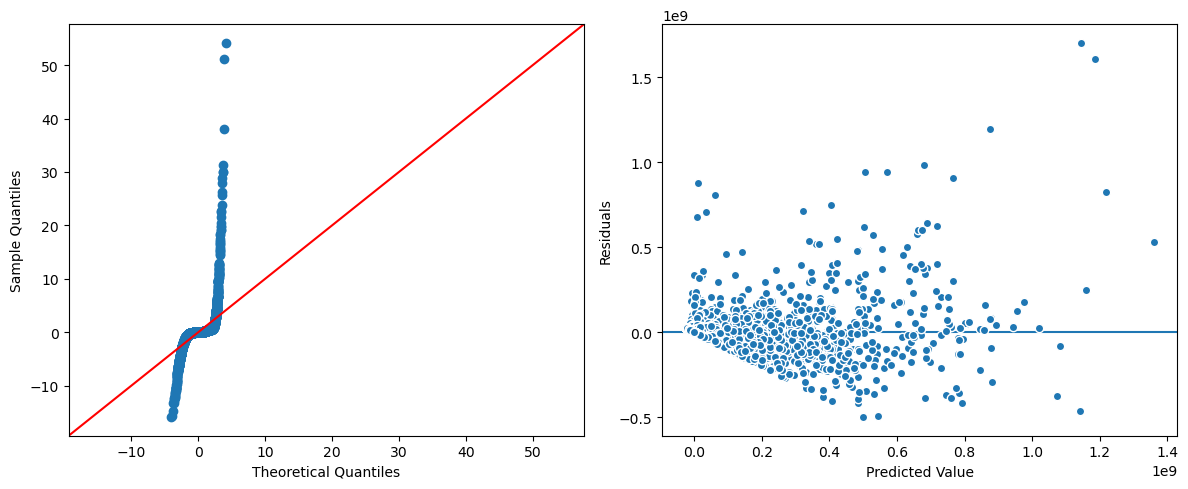

In [48]:
# Function to plot qq plot and residual plot
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

## Outliers

In [ ]:
scaler = StandardScaler()
z_revenue = scaler.fit_transform(y_train.values.reshape(-1,1))
z_revenue

In [ ]:
z_revenue = pd.Series(z_price.flatten(),index=y_train.index )
z_revenue

In [ ]:
## saving the true/false result as our outlier index
idx_outliers= z_revenue>3
idx_outliers

In [ ]:
## How many outliers did we find?
idx_outliers.sum()

In [ ]:
## saving a cleaned version of y_train and X_train with outliers removed
y_train_cln = y_train[~idx_outliers]
X_train_cln = X_train_df[~idx_outliers]

### What values of price were removed from our analysis:

In [ ]:
print(f"Our model includes homes priced:")
print(f"- Greater than ${y_train_cln.min():,.2f}")
print(f"- Less than ${y_train_cln.max():,.2f}")

## Removing Outliers from Test data

In [ ]:
# Getting scaled y_test
z_price_test = scaler.transform(y_test.values.reshape(-1,1))
z_price_test = pd.Series(z_price_test.flatten(),index=y_test.index )
# saving the true/false result as our outlier index
idx_outliers_test= z_price_test>3
# how many outleirs in test data?
idx_outliers_test.sum()

In [ ]:
## make clean version of X_test and y_test
X_test_cln = X_test_df[~idx_outliers_test] 
y_test_cln = y_test[~idx_outliers_test]

In [ ]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train_cln,X_train_cln)
result = model.fit()
print(result.summary())

evaluate_ols(result,X_train_cln,y_train_cln)

## Remove Column with Insignificatn P-values

In [ ]:
## save p-values
p_vals = result.pvalues
## filter for p_values that are >.05
p_vals[p_vals>.05]

In [ ]:
## so how many zipcode columns do we have overall? 
# use a list comprehension to filter out column sthat start with zipcode
zipcode_cols = [col for col in X_train_df.columns if col.startswith('zipcode')]
## preview first few zipcode cols to confirm
zipcode_cols[:3]

In [ ]:
len(zipcode_cols)

In [ ]:
## So how many zipcode coeffs are insig?
len(p_vals[p_vals>.05])

## Evaluating the Model on the Testing Data

In [ ]:
## evaluate test
r2_test = r2_score(y_test_cln, result.predict(X_test_cln))
print(f"R-Squared for Test Data: {r2_test:.2f}")
eval

# Saving Model 

In [ ]:
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_cln,
         'y_train':y_train_cln,
         'X_test':X_test_cln,
         'y_test':y_test_cln,
          'Outlier Scaler':scaler,
          'Column Transformer':preprocessor,
         'OLS Results': result}



In [ ]:
import joblib
joblib.dump(export, 'ols_results.joblib')

In [ ]:
## LOADING JOBLIB
#import joblib
loaded_data = joblib.load('ols_results.joblib')
loaded_data.keys()

- iterating on our model & interpreting coefficients
- next class

## Checking Normality with Q-Q Plot & Homocedasticity with a Scatter Plot

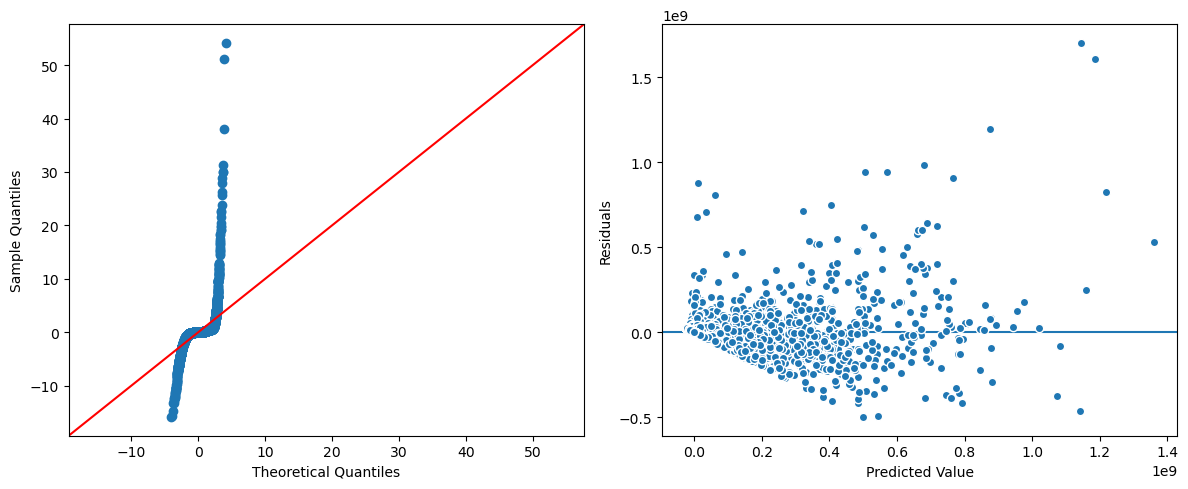

In [48]:
# Function to plot qq plot and residual plot
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

## Linearity Assumption

In [24]:
## saving list of numeric features to slice for pairplot
num_selector = make_column_selector(dtype_include='number')
cols = num_selector(df.drop(columns='revenue'))
len(cols)



9

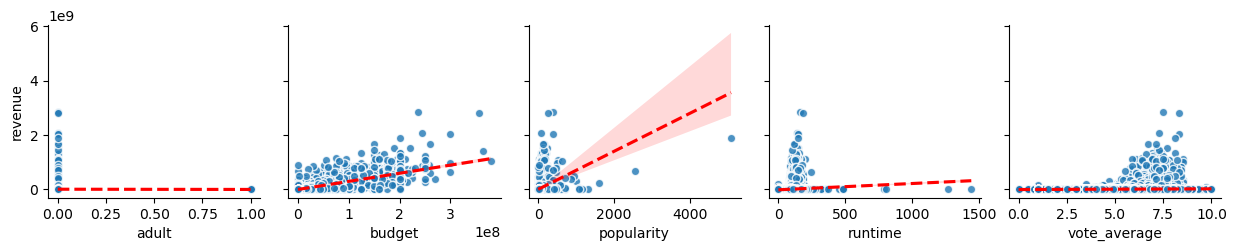

In [26]:
## Making a pairplot with regression lines for the first 5 features

sns.pairplot(df, y_vars='revenue',kind='reg',x_vars=cols[:5],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

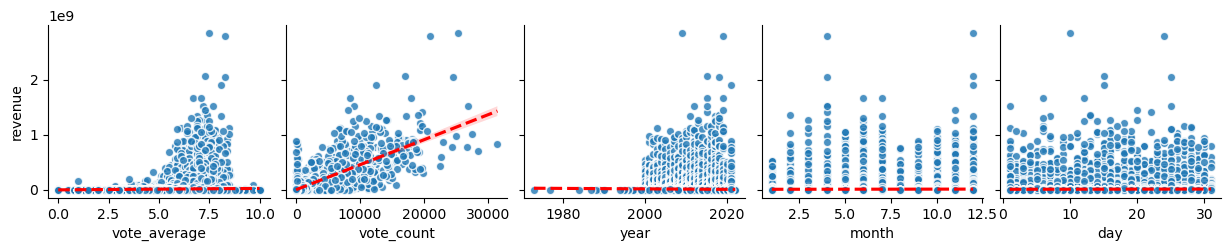

In [27]:
## Making a pairplot with regression lines for the last 4 features

sns.pairplot(df, y_vars='revenue',kind='reg',x_vars=cols[4:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

## Little to No Multicollinearity/ Independence of Features

In [28]:
## Calc abs values of correlations
corr = df.drop(columns='revenue').corr().abs()
corr

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,Genre_Comedy,Genre_Music,Genre_Romance,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
adult,1.000000,0.005762,0.008065,0.005671,0.011874,0.025438,0.007712,0.014971,0.003033,0.001925,...,0.006463,0.009861,0.006079,0.003391,0.005241,0.003034,0.001311,0.003693,0.013740,0.002796
belongs_to_collection,0.005762,1.000000,0.235800,0.159918,0.065086,0.132980,0.245135,0.057782,0.001112,0.020559,...,0.014745,0.129067,0.017185,0.005774,0.002618,0.010300,0.015863,0.045757,0.013431,0.025338
budget,0.008065,0.235800,1.000000,0.335975,0.142187,0.136198,0.722767,0.022947,0.000892,0.006603,...,0.043065,0.115674,0.014807,0.016063,0.041663,0.013951,0.015498,0.078062,0.022377,0.025308
popularity,0.005671,0.159918,0.335975,1.000000,0.074840,0.119116,0.355344,0.007400,0.000586,0.002527,...,0.009203,0.051699,0.016222,0.003177,0.009851,0.003039,0.012188,0.042867,0.021525,0.019691
runtime,0.011874,0.065086,0.142187,0.074840,1.000000,0.255538,0.135534,0.020697,0.025592,0.100589,...,0.095979,0.014256,0.027355,0.003997,0.063057,0.024463,0.025184,0.000888,0.042835,0.058312
vote_average,0.025438,0.132980,0.136198,0.119116,0.255538,1.000000,0.159004,0.086182,0.031760,0.099329,...,0.078022,0.080594,0.037688,0.000585,0.053761,0.021825,0.017075,0.015479,0.049552,0.077738
vote_count,0.007712,0.245135,0.722767,0.355344,0.135534,0.159004,1.000000,0.013095,0.000360,0.002126,...,0.020001,0.057395,0.030843,0.010568,0.019868,0.011397,0.015277,0.044515,0.023930,0.024477
Genre_Comedy,0.014971,0.057782,0.022947,0.007400,0.020697,0.086182,0.013095,1.000000,0.025111,0.176663,...,0.069915,0.065626,0.093726,0.027081,0.061036,0.011096,0.023213,0.038812,0.002946,0.012244
Genre_Music,0.003033,0.001112,0.000892,0.000586,0.025592,0.031760,0.000360,0.025111,1.000000,0.040281,...,0.011713,0.020501,0.027719,0.001278,0.003482,0.000504,0.048205,0.008817,0.017027,0.004037
Genre_Romance,0.001925,0.020559,0.006603,0.002527,0.100589,0.099329,0.002126,0.176663,0.040281,1.000000,...,0.013341,0.033774,0.045138,0.020732,0.007694,0.022513,0.026665,0.063651,0.005596,0.014653


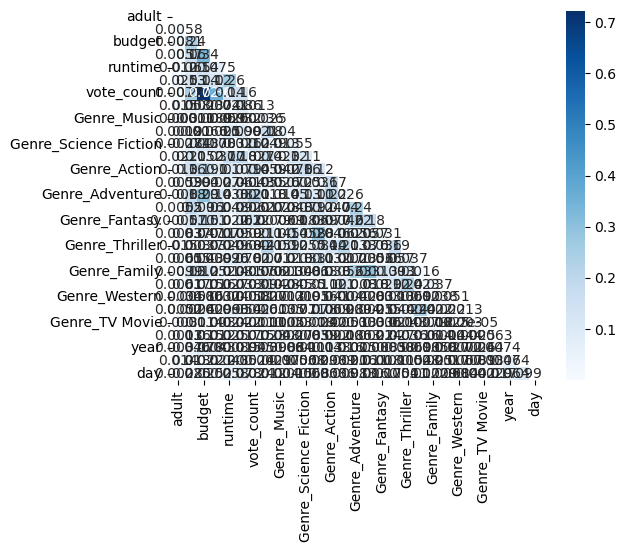

In [29]:
## Calculating the mask to hide the upper-right of the triangle
corr = df.drop(columns='revenue').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Blues', annot=True, mask=mask);

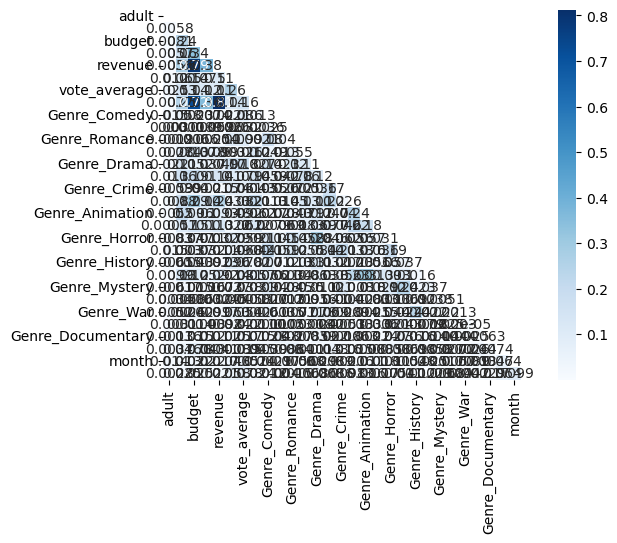

In [30]:
## Adding price back to the correlation heatmap
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Blues', annot=True, mask=mask);